# Model Analysis of the Solow Swan Model w. Technological Progress

In this model project, we decided to analyze the Solow Swan model with technological progress. The Solow-Swan model, also known as the Solow growth model, is a classical framework used to analyze long-term economic growth. The model highlights the role of capital accumulation, labor or population growth, and technological progress in driving economic growth. Our analysis extends the analysis on the standard Solow model by short term and long term shocks.


**Table of contents**<a id='toc0_'></a>    
- 1. [Model Framework](#toc1_)    
- 2. [Analytical Solution](#toc2_)    
- 3. [Numerical Solution](#toc3_)    
- 4. [Concluding Remarks](#toc4_)    
  
<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Model Framework](#toc0_)

**Production Function**

The production function describes how inputs (capital and labor) are combined into output. In our extended Solow model, the production function is given by:

$$
Y_t = A_tK_t^\alpha L_t^{1-\alpha}
$$

where:
- $Y_t$ is the output at time \( t \)
- $A_t$ is the technology level
- $K_t$ is the capital stock
- $L_t$ is labor
- $\alpha$ is the output elasticity of capital

**Capital Accumulation Equation**

The capital accumulation equation determines how the capital stock evolves over time:

$$
\Delta K_t = sY_t - (\delta + n + g) K_t
$$

where:
- $\Delta K_t$ is the change in capital stock
- $s$ is the savings rate
- $\delta$ is the depreciation rate
- $n$ is the population growth rate
- $g$ is the technology growth rate

**Steady-State Capital**

At the steady state, the capital per effective worker does not change 

$$ \Delta k = 0:$$

$$k^* = \left( \frac{s}{\delta + n + g} \right)^{\frac{1}{1-\alpha}}
$$

**Steady-State Output**

The steady-state output per effective worker is:
$$
y^* = (k^*)^\alpha
$$

**Steady-State Consumption**

The steady-state consumption per effective worker is:
$$
c^* = (1 - s) y^*
$$
Here, it's important to note that in our Solow Swan model, consumption is a fraction of income, hence why we don't utilize any discount factors such as $\beta$

## 2. <a id='toc2_'></a>[Analytical Solution](#toc0_)

Firstly, we aim to solve our model analytically to ensure that our numerical solutions match our expectations. We used the SymPy library to analytically solve the steady-state values of the Solow-Swan model. We start by defining the key variables: capital, output elasticity of capital, depreciation rate, savings rate, technological growth rate, and population growth rate. We then formulated the production function and the steady-state condition. The steady state capital per worker is solved using sm.solve(ss, k)[0], which gives the analytical expression for k in steady state. We then define the steady state output (y*) and consumption (c*) as functions of k*. By solving the steady-state equation, we derive the steady-state capital per worker. Using this, we calculated the steady-state output and consumption per worker. Finally, we substituted specific parameter values to obtain numerical solutions.

As seen below, the SymPy solution yields the following steady-state values:

- **Steady-State Capital**: Approximately 3.69. This indicates that the economy's capital per effective worker will converge to this level in the long run.
- **Steady-State Output**: Approximately 1.48. This represents the output per effective worker when the economy is at its steady-state capital level, indicating overall productivity.
- **Steady-State Consumption**: Approximately 1.18. This denotes the consumption per effective worker at the steady state.

The analytical solution provides a our benchmark for the steady state values of capital, output, and consumption in the Solow-Swan model. Since the model assumptions and parameter values are consistent, the numerical solution obtained through optimization methods (such as optimize.root_scalar, which we use) should closely match the analytical results.

In [24]:
import sympy as sm

# Define the variables
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

# Production function per capita
f = k**alpha

# Define the steady state equation
ss = sm.Eq(k, (s * f + (1 - delta) * k) / ((1 + n) * (1 + g)))

# Solve for the steady state capital per worker
kss = sm.solve(ss, k)[0]

# Define the output and consumption at steady state
yss = kss**alpha
css = (1 - s) * yss

# Display the steady-state equations
steady_state_k = sm.simplify(sm.Eq(k, kss))
steady_state_y = sm.simplify(sm.Eq(yss, kss**alpha))
steady_state_c = sm.simplify(sm.Eq(css, (1 - s) * yss))

display(steady_state_k)
display(steady_state_y)
display(steady_state_c)

# Substitute parameter values and calculate the numerical steady-state values
params = {s: 0.2, delta: 0.05, n: 0.01, g: 0.02, alpha: 0.3}
kss_value = kss.evalf(subs=params)
yss_value = yss.evalf(subs=params)
css_value = css.evalf(subs=params)

# Display numerical steady-state values
print(f"Steady-state capital (k*): {kss_value}")
print(f"Steady-state output (y*): {yss_value}")
print(f"Steady-state consumption (c*): {css_value}")


Eq(k, ((delta + g*n + g + n)/s)**(1/(alpha - 1)))

True

True

Steady-state capital (k*): 3.68923746670393
Steady-state output (y*): 1.47938422414828
Steady-state consumption (c*): 1.18350737931862


## 3. <a id='toc3_'></a>[Numerical Solution](#toc0_)

In the Python file, we have classified the Solow-Swan model. We have incorporated parameters such as the savings rate, depreciation rate, technological progress, and population growth. We have structured our analysis to solve the model numerically, focusing mainly on the use of numerical methods to find the steady states and transition paths of key economic variables.

We utilize libraries such as numpy for numerical operations and array manipulations, matplotlib for plotting results to visualize transition paths and steady states, and scipy, the optimize module, for solving equations numerically.

Key components of our analysis include the initialization of the model parameters, the definition of a Cobb-Douglas production function, and the numerical calculation of the steady state. The steady state is found by solving an equation that balances savings with depreciation and growth using the root_scalar method from scipy.optimize. This method applies root-finding algorithms to determine the value of capital at which the equation balances, indicating the steady state.

We then simulate the transition path of the economy over time we iteratively calculate capital, output, and consumption for each time period until the system reaches its steady state. This involves solving difference equations that describe how capital evolves over time.

**Imports**

In [25]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from SolowSwanModel import SolowSwanModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Initialize the model**

In [26]:
model = SolowSwanModel()

**Solve the initial model**

Firstly, we calculate the initial steady-state values for the capital stock (K), output (Y), and consumption (C) using the find_steady_state method of the SolowSwanModel class.  We want to clarfify that in this part of the code (see py file), we have utilized the optimize.root_scalar method with the brentq algorithm, a technique covered in one of our exercise classes. Initially, we experimented with various numerical methods, including fsolve, but encountered issues with convergence. Therefore, we decided to apply the brentq algorithm since it's the only method that ensured reliable convergence for determining the steady-state values. The results are then printed below.

Next, we solve for the transition path of the economy from the initial state to the steady state using the solve_transition_path method. Here, $\Delta K_t$ is implicitly computed as the difference between $K_t$ and $K_{t-1}$.This method iterates over the time horizon, updating the capital stock, output, and consumption at each time step based on the Solow-Swan model's equations. Here, we also used ChatGPT for assistance as we experienced difficulties with ensuring convergence in our model framwork (see py file for comment).

We then plot the results using the plot_results method, which constructs graphs showing the transition paths of physical capital, output, and consumption. The red dashed lines in the plots represent the steady-state values.

As given below, the initial steady state values indicate the long-run equilibrium levels of capital, output, and consumption in the economy. For instance, K= 3.6892 indicates that in the absence of shocks, the economy will eventually stabilize at this level of capital.

The plots illustrate the dynamic adjustment process. Initially, capital, output, and consumption may be below their steady state values. As time progresses, the economy saves and invests, capital accumulates, which leads to higher output and consumption. The red dashed lines represent the steady state values, which the economy converges to over time. This convergence shows the stability of the steady state, with the economy gradually approaching equilibrium.

Initial steady state:
K_ss = 3.6892
Y_ss = 1.4794
C_ss = 1.1835


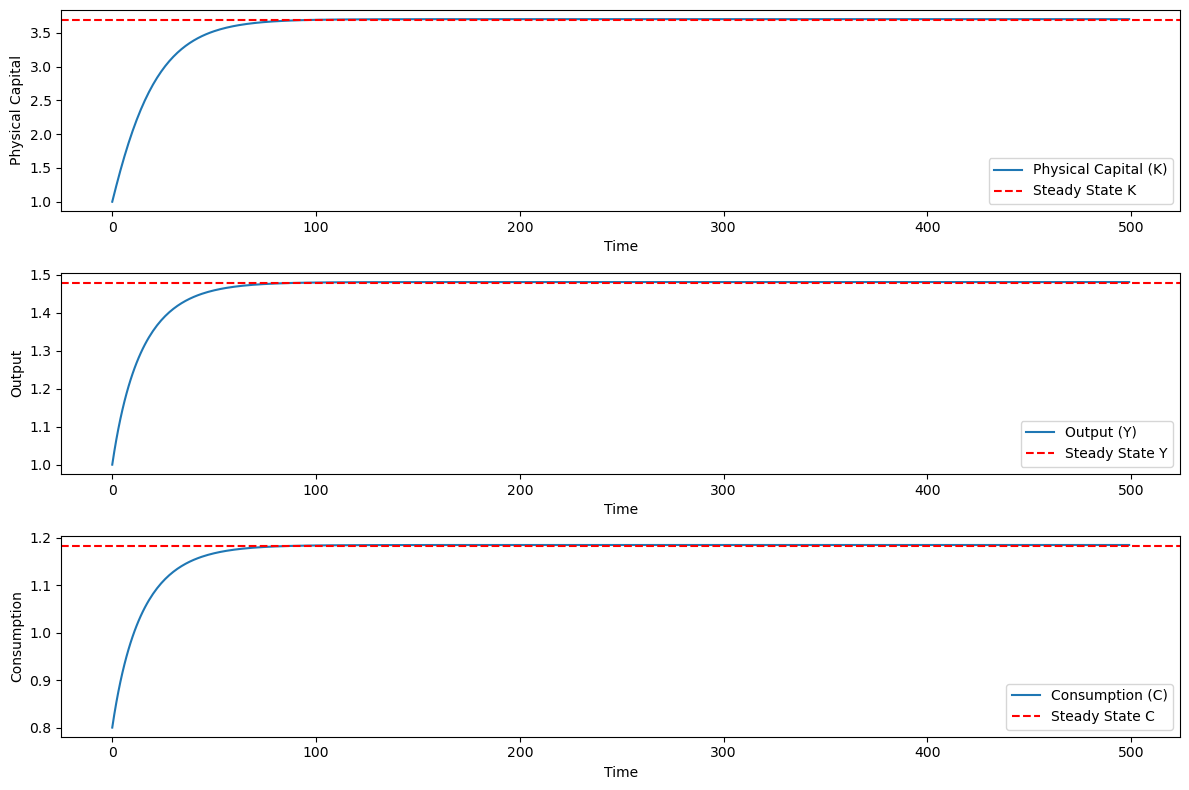

In [27]:
# Initial steady state
K_ss, Y_ss, C_ss = model.find_steady_state()

# Initial steady state values
print("Initial steady state:")
print(f"K_ss = {K_ss:.4f}")
print(f"Y_ss = {Y_ss:.4f}")
print(f"C_ss = {C_ss:.4f}")

# Initial transition path
K_path, Y_path, C_path = model.solve_transition_path()

# Plot the initial results
model.plot_results(K_path, Y_path, C_path, K_ss, Y_ss, C_ss)

**Temporary shock: Reduction in intital capital by 50 percent**

In this section, we apply a temporary shock to the model by reducing the initial capital to 50 percent of its initial steady state value. This is done by setting model.K_initial to half of K_ss. The solve_transition_path method is then used to compute the new transition paths for capital, output, and consumption starting from this reduced initial capital level.

We plot these new transition paths to observe how the economy adjusts back to its steady state after the temporary shock. The red dashed lines indicate the steady state values, which remain unchanged, as a temporary shock only affects the transition path and not the long-run equilibrium.

After the temporary reduction in capital, we observe that the economy begins with lower levels of capital, output, and consumption. However, over time, the economy gradually recovers as savings and investments rebuild the capital stock. This recovery leads to increases in output and consumption, and eventually converges back to the original steady state values. This demonstrates the resilience of the Solow Swan economy and its tendency to return to equilibrium after a temporary shock.

Applying a temporary reduction in initial capital


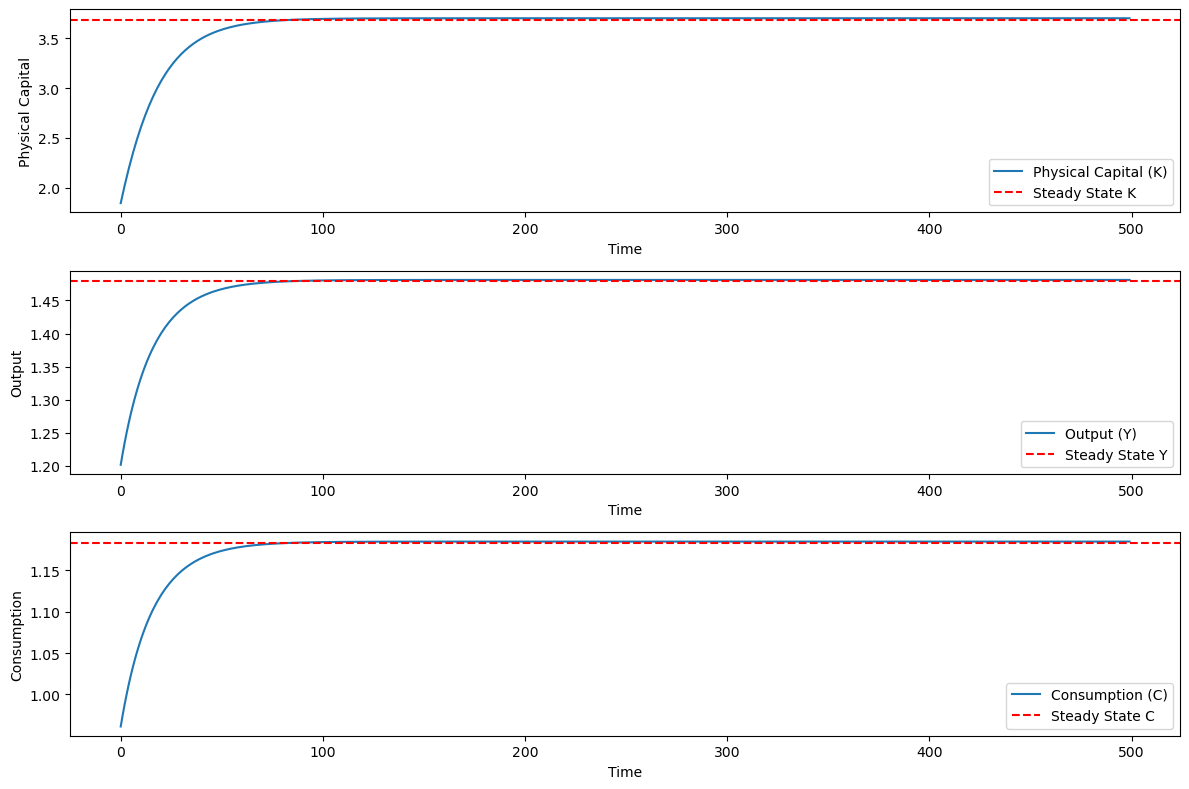

Steady state after temporary reduction in initial capital:
K_ss = 3.6892
Y_ss = 1.4794
C_ss = 1.1835


In [28]:
# Apply temporary shock
print("Applying a temporary reduction in initial capital")
model.K_initial = 0.5 * K_ss
K_path_temp, Y_path_temp, C_path_temp = model.solve_transition_path()
model.plot_results(K_path_temp, Y_path_temp, C_path_temp, K_ss, Y_ss, C_ss)

# Print the steady state values after the temporary shock
print("Steady state after temporary reduction in initial capital:")
print(f"K_ss = {K_ss:.4f}")
print(f"Y_ss = {Y_ss:.4f}")
print(f"C_ss = {C_ss:.4f}")


**Permanent shock: Increase in the savings rate**

In this section, we reset the initial capital to its original value and apply a permanent shock by increasing the savings rate from 0.2 to 0.3. This change is constructed by updating the model's savings rate parameter model.s. We then compute the new steady state values using the find_steady_state method and solve for the new transition paths with the solve_transition_path method.

After the permanent increase in the savings rate, the economy experiences higher levels of capital, output, and consumption in the new steady state. The increase in savings leads to more investment, which in turn raises the capital stock. As capital accumulates, output also increases due to higher production capacity. Consumption rises as well, but at a slower rate compared to capital and output, because a higher proportion of output is being saved. The transition paths show that the economy adjusts to the new higher steady state levels, which illustrates the long-term impact of a higher savings rate on economic growth.

Applying a permanent increase in savings rate


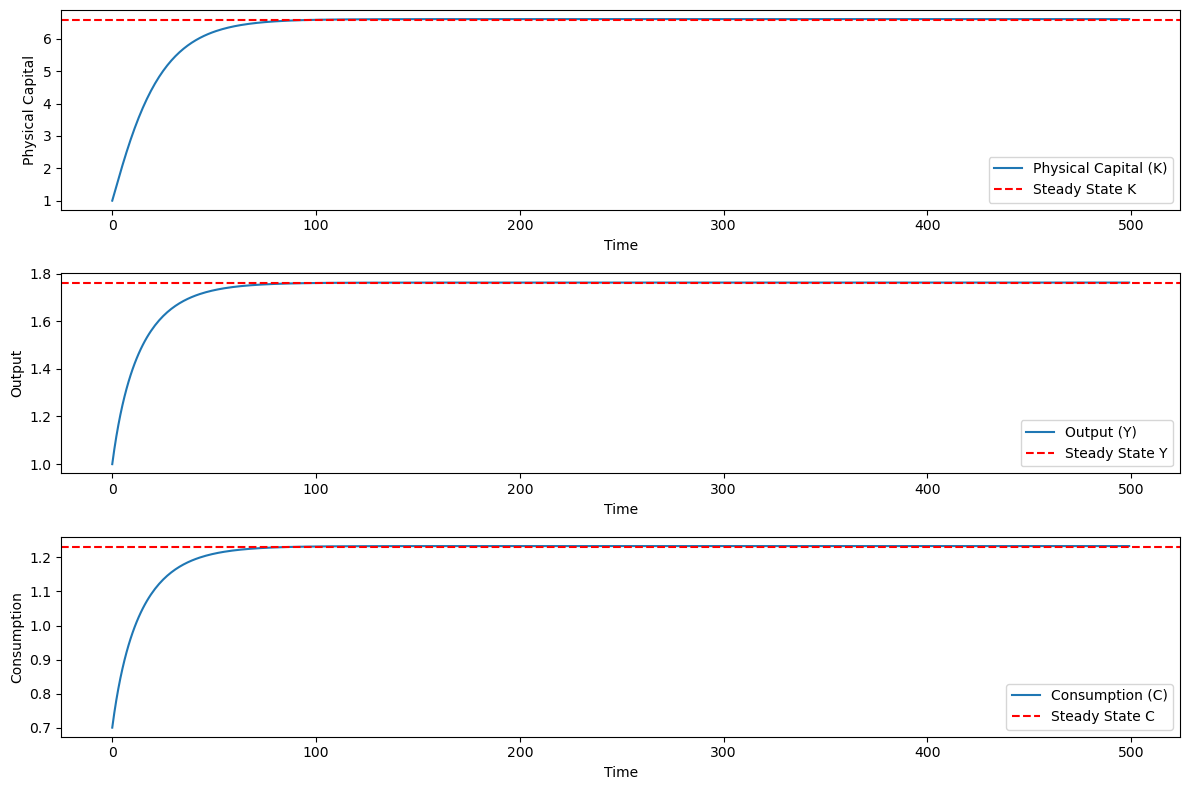

New steady state after permanent savings rate increase:
K_ss = 6.5841
Y_ss = 1.7601
C_ss = 1.2321


In [29]:
# Reset initial conditions
model.K_initial = 1.0

# Apply a permanent shock: increase savings rate
print("Applying a permanent increase in savings rate")
model.s = 0.3
K_ss_new, Y_ss_new, C_ss_new = model.find_steady_state()
K_path_new, Y_path_new, C_path_new = model.solve_transition_path()
model.plot_results(K_path_new, Y_path_new, C_path_new, K_ss_new, Y_ss_new, C_ss_new)

# Print the new steady state values after the permanent shock
print("New steady state after permanent savings rate increase:")
print(f"K_ss = {K_ss_new:.4f}")
print(f"Y_ss = {Y_ss_new:.4f}")
print(f"C_ss = {C_ss_new:.4f}")


**Sensitivity Analysis: How the steady state changes with different savings rates**

In this analysis, we analyze how changes in the savings rate (s) affect the steady state values of capital $K_{ss}$, output $Y_{ss}$, and consumption $C_{ss}$. We vary the savings rate from 0.1 to 0.5 and compute the corresponding steady state values using the model. The find_steady_state method from our SolowSwanModel class is utilized to compute these values.

The plot shows a steep and continuous increase in the steady state capital as the savings rate increases. We expected this relationship because higher savings rates lead to higher investments, which in turn accumulate more capital over time. Thus, the economy can sustain a larger capital stock in the steady state.

The steady state output also increases with the savings rate, but at a slower rate compared to capital. This is because output is a function of capital, and while more capital does lead to higher output, the increase is less effective due to diminishing returns to capital in the production function.

Interestingly, we observe an intial increase in the steady state consumption with the savings rate. It does, however, starts to level off and even slightly decrease at higher savings rates. This is due to the trade-off between saving and consumption - While saving more increases capital and output, it also reduces the portion of output available for consumption. At very high savings rates, the reduction in consumption from saving more outweighs the gains from increased output.

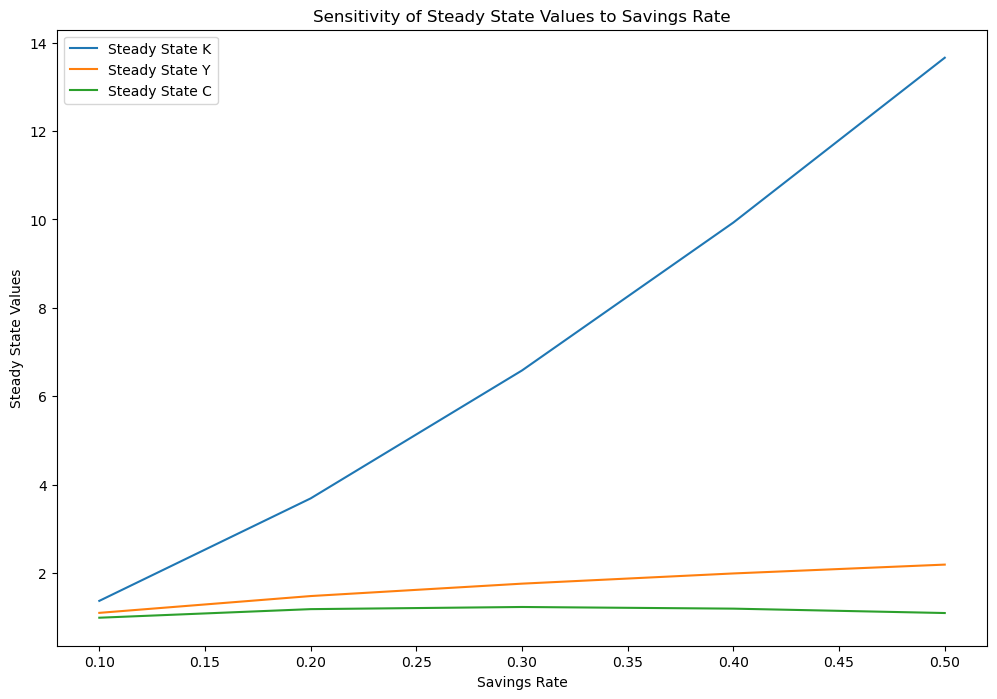

In [30]:
s_values = np.linspace(0.1, 0.5, 5)
K_ss_values = []
Y_ss_values = []
C_ss_values = []

for s in s_values:
    model.s = s
    K_ss_s, Y_ss_s, C_ss_s = model.find_steady_state()
    K_ss_values.append(K_ss_s)
    Y_ss_values.append(Y_ss_s)
    C_ss_values.append(C_ss_s)

plt.figure(figsize=(12, 8))
plt.plot(s_values, K_ss_values, label='Steady State K')
plt.plot(s_values, Y_ss_values, label='Steady State Y')
plt.plot(s_values, C_ss_values, label='Steady State C')
plt.xlabel('Savings Rate')
plt.ylabel('Steady State Values')
plt.legend()
plt.title('Sensitivity of Steady State Values to Savings Rate')
plt.show()

## 4. <a id='toc4_'></a>[Concluding Remarks](#toc0_)

In our analysis of the Solow-Swan model, we utilized both numerical and analytical methods to explore the steady-state dynamics of the economy. For the analytical part, we used the sympy library to define the production function and the steady-state equations symbolically. We solved for the steady-state capital and derived the steady-state output and consumption analytically. By substituting parameter values into the analytical expressions, we obtained numerical values for the steady-state variables, which, as expected, were close to the numerical solutions. 

We constructed our model using Python and used the scipy.optimize library, particularly the root_scalar function, to numerically solve for the steady-state capital, output, and consumption. The solve_transition_path function was implemented to compute the transition path of the economy from an initial state to the steady state, using iterative methods to simulate the dynamics over a specified time horizon. We also incorporated both temporary and permanent shocks to the model to observe their effects on the economy's transition path and new steady states. 

*Economic results*

Our findings indicate that the Solow-Swan model successfully captures the key dynamics of economic growth and convergence to a steady state. The initial steady-state values for capital, output, and consumption align closely between the numerical and analytical solutions. The temporary shock, represented by a reduction in initial capital, demonstrates the model's ability to return to its steady state over time, highlighting the economy's resilience. The permanent increase in the savings rate leads to higher steady-state values for capital, output, and consumption, which depicts the positive impact of increased savings on long-term economic growth.The model emphasizes the importance of savings and investment in driving economic growth. It shows that economies with higher savings rates can achieve higher levels of capital accumulation, which in turn leads to increased output and consumption. However, the model's simplicity also limits its usage in real-world scenarios. We could have extended the model to incorporate endogenous technological progress, human capital, or policy interventions. Additionally, analyzing the effects of different types of shocks, such as productivity shocks or policy changes, could provide a more complex understanding of the economy's response to various factors.

*Potential improvements*

Initially, we wanted to analyze the RBC (Real Business Cycle) model. However, we encountered complications, such as difficulties calibrating the model parameters, difficulties in solving the dynamic stochastic differential equations, and the challenge of incorporating realistic shocks. These challenges led us to switch to the Solow Swan model.

We could have improved our analysis by exploring alternative numerical methods, such as using more complex root-finding algorithms or optimization techniques. Additionally, enhancing the robustness of the model by incorporating stochastic elements or more complex dynamics could provide deeper insights.